# ECG Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [2]:
normal = pd.read_csv('c:/Users/ASUS/Desktop/ptbdb_normal.csv')
abnormal = pd.read_csv('c:/Users/ASUS/Desktop/ptbdb_abnormal.csv')

In [3]:
new_column_name = []
for num in range(abnormal.shape[1]-1):
    tem = 'time' + str(num)
    new_column_name.append(tem)
new_column_name.append("Label")    #label = 1 for abnormal
abnormal.columns = new_column_name    


column_name = []
for num in range(normal.shape[1]-1):
    tem = 'time' + str(num)
    column_name.append(tem)
column_name.append("Label")    #label = 0 for normal
normal.columns = column_name

abnormal.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
data=[normal,abnormal]
data=pd.concat(data)

In [5]:
data["Label"].value_counts()   #we have 10505 abnormal(1) beat and 4045 normal(0) beat.

1.0    10505
0.0     4045
Name: Label, dtype: int64

0.0


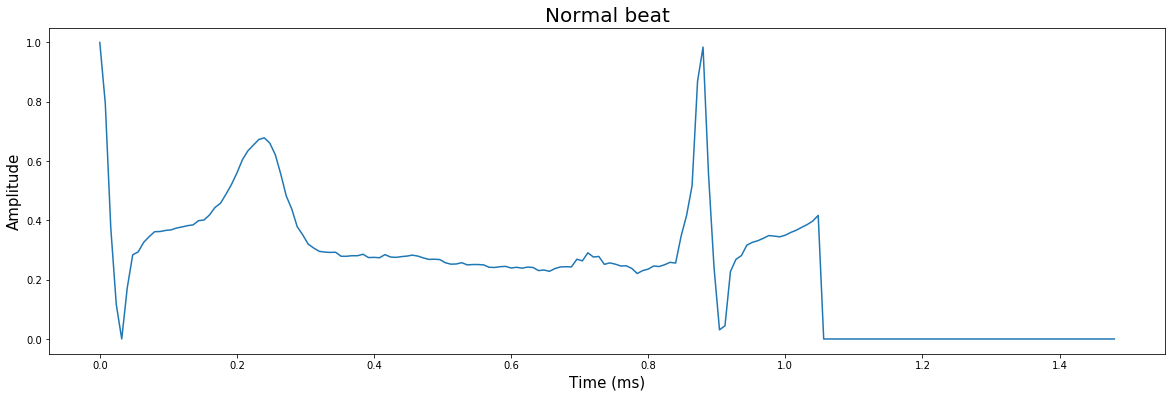

In [6]:
x = np.arange(0, 186)*8/1000    #to second

print(data.iloc[0,187]) #normal sample
plt.figure(figsize=(20,6))
plt.title("Normal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[0,:186]) 

#normal beat sample


1.0


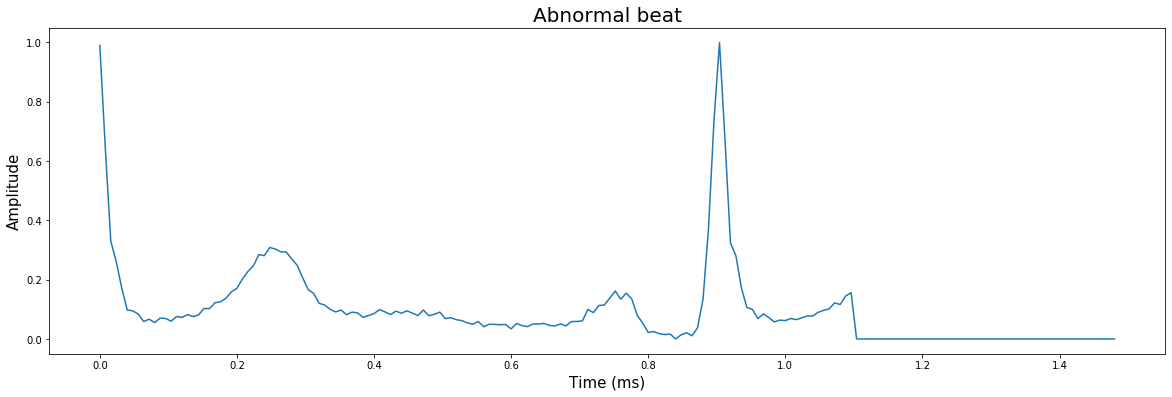

In [7]:
x = np.arange(0, 186)*8/1000   #to second

print(data.iloc[10000,187]) #abnormal sample
plt.figure(figsize=(20,6))
plt.title("Abnormal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[10000,:186]) 

#abnormal sample

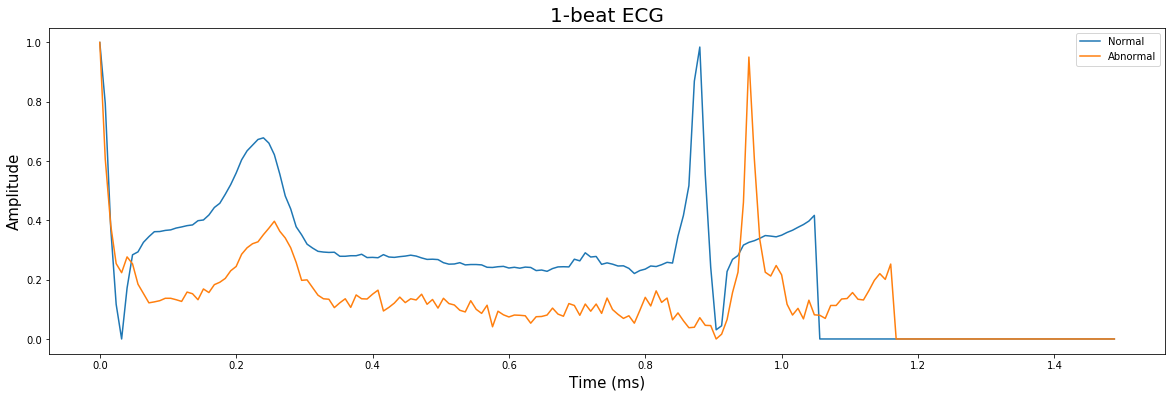

In [8]:
M = data.values
X = M[:, :-1]                    #all features
y = M[:, -1].astype(int)         #label
x = np.arange(0, 187)*8/1000     #to second

#grouping and sorting
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()

plt.figure(figsize=(20,6))
plt.plot(x, X[C0, :][0], label="Normal")    #one sample normal
plt.plot(x, X[C1, :][0], label="Abnormal")  #one sample abnormal
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [9]:
from sklearn.utils import shuffle
data=shuffle(data)                 #shuffle the data to for training
data.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
5610,0.904965,0.620567,0.239007,0.179433,0.174468,0.131206,0.046099,0.012766,0.039007,0.009929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054,0.973957,0.745783,0.110684,0.052382,0.079017,0.069843,0.045576,0.045872,0.037881,0.036401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8342,1.000000,0.678453,0.365746,0.061878,0.179558,0.275138,0.260773,0.242541,0.252486,0.262983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9544,1.000000,0.499174,0.240331,0.090909,0.097190,0.086281,0.061488,0.053884,0.052231,0.050579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75,0.988406,0.682899,0.307246,0.122319,0.117101,0.048696,0.046377,0.037101,0.028406,0.063188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y = data["Label"].values   #our labels

data.drop(["Label"],axis=1,inplace=True)  

x = data  #features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [24]:
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))
print(np.count_nonzero(y_test == 0))

#dağılımlar iyi gözüküyor.

8399
3241
2106
804


In [18]:
x_train = x_train.values.T
x_test = x_test.values.T

y_train = y_train.reshape(-1,1).T
y_test = y_test.reshape(-1,1).T

In [25]:
def initialize_param(layers_with_nodes,in_data,out_data):
    
    #input layer's values.
    
    layer_amount = len(layers_with_nodes)
    
    parameters = {}
    parameters["weight1"] = np.random.randn(layers_with_nodes[0],in_data.shape[0]) * 0.1
    parameters["bias1"] = np.zeros((layers_with_nodes[0],1))
    
    print("" + str(layer_amount+2) + " layers. (" + str(layer_amount) + " hidden layer)")

    #the hidden layer's values.
    
    for i in range(layer_amount-1):
        #print(i+2)
        w = "weight" + str(i+2)
        b = "bias" + str(i+2)
        parameters[w] = np.random.randn(layers_with_nodes[i+1],layers_with_nodes[i]) * 0.1
        parameters[b] = np.zeros((layers_with_nodes[i+1],1))
    
    #output layer's values.
    
    lastw = "weight" + str(layer_amount+1)
    lastb = "bias" + str(layer_amount+1)
    parameters[lastw] = np.random.randn(out_data.shape[0],layers_with_nodes[layer_amount-1]) * 0.1
    parameters[lastb] = np.zeros((out_data.shape[0],1))
    
    return parameters, (layer_amount+1)

In [26]:
def sigmoid(x):
    y_head = 1/(1 + np.exp(-x))   # basic sigmoid for output layer
    return y_head;

def compute_cost(A_f, y_train):
    logprobs = np.multiply(np.log(A_f),y_train)
    cost = -np.sum(logprobs)/y_train.shape[1]    # computing the loss value
    return cost

In [27]:
def forw_prop_NN(in_data, parameters, connection_amount): # forward propagation
    
    cache = {}
    a0 = in_data
    
    
    for i in range(connection_amount-1):
        w = "weight" + str(i+1)   
        b = "bias" + str(i+1) 
        
        z = "Z" + str(i+1)
        a = "A" + str(i+1)
        
        cache[z] = np.dot(parameters[w],a0) + parameters[b]
        cache[a] = np.tanh(cache[z])
        a0 = cache[a]
        
        
    # output layer
    
    z_fin = "Z" + str(connection_amount)
    a_fin = "A" + str(connection_amount)
    
    w = "weight" + str(connection_amount)   
    b = "bias" + str(connection_amount)
    
    a0 = "A" + str(connection_amount-1)
    
    cache[z_fin] = np.dot(parameters[w],cache[a0]) + parameters[b]
    cache[a_fin] = sigmoid(cache[z_fin])
    A = cache[a_fin]
 
    return A, cache

In [28]:
def backw_prop_NN(parameters,cache,x_train,y_train,connection_amount):  #backpropagation
    
    dz = {}
    grads = {}
    
    
    # firstly start with output layer.
    
    a_fin = "A" + str(connection_amount)
    a_pre_fin = "A" + str(connection_amount-1)
    w_fin = "dweight" + str(connection_amount)
    b_fin = "dbias" + str(connection_amount)
    
    dz[connection_amount] = cache[a_fin] - y_train
    grads[w_fin] = np.dot(dz[connection_amount],cache[a_pre_fin].T)/x_train.shape[1]
    grads[b_fin] = np.sum(dz[connection_amount], axis=1, keepdims=True)/x_train.shape[1]
    
    # other layers.
    
    for i in range((connection_amount-1),1,-1):
        a = "A" + str(i)
        a_pre = "A" + str(i-1)
        dw = "dweight" + str(i)
        db = "dbias" + str(i)
        w = "weight" + str(i+1)
        
        dz[i] = np.dot(parameters[w].T,dz[i+1])*(1 - np.power(cache[a], 2))
        grads[dw] = np.dot(dz[i],cache[a_pre].T)/x_train.shape[1]
        grads[db] = np.sum(dz[i], axis=1,keepdims=True)/x_train.shape[1]
    
    dz[1] = np.dot(parameters["weight2"].T,dz[2])*(1 - np.power(cache["A1"], 2))
    grads["dweight1"] = np.dot(dz[1],x_train.T)/x_train.shape[1]
    grads["dbias1"] = np.sum(dz[1],axis =1,keepdims=True)/x_train.shape[1]
    
    return grads

In [29]:
def update_param(parameters, grads, connection_amount, lr=0.01): #update
    for i in range(connection_amount):
        w = "weight" + str(i+1)
        b = "bias" + str(i+1)
        dw = "dweight" + str(i+1)
        db = "dbias" + str(i+1)
        
        parameters[w] = parameters[w] - lr*grads[dw]
        parameters[b] = parameters[b] - lr*grads[db]
        
    return parameters                

In [30]:
def predict(A,parameters,x_test,connection_amount): #prediction
    
    A, cache = forw_prop_NN(x_test,parameters,connection_amount)
    Y_prediction = np.zeros((1,x_test.shape[1]))
 
    for i in range(A.shape[1]):
        if A[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction             # basic binary prediction.

In [31]:
def multi_layer_model(layers_with_nodes,x_train,y_train,x_test,y_test, num_iter, lr = 0.01):    
    
    cost_list = []     
    index_list = []
    
    parameters, connection_amount = initialize_param(layers_with_nodes, x_train, y_train)   
    
    # for each iteration..
    
    for i in range(0, num_iter):
         # forward propagation
        A, cache = forw_prop_NN(x_train,parameters,connection_amount)
        # compute cost
        cost = compute_cost(A, y_train)
         # backward propagation
        grads = backw_prop_NN(parameters,cache,x_train,y_train,connection_amount)
         # update parameters
        parameters = update_param(parameters, grads, connection_amount, lr)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
   
    y_prediction_train = predict(A, parameters, x_train, connection_amount)
    y_prediction_test = predict(A, parameters, x_test, connection_amount)
    
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters, connection_amount

4 layers. (2 hidden layer)
Cost after iteration 0: 0.496494
Cost after iteration 100: 0.216698
Cost after iteration 200: 0.189489
Cost after iteration 300: 0.125137
Cost after iteration 400: 0.116269
Cost after iteration 500: 0.108700
Cost after iteration 600: 0.103261
Cost after iteration 700: 0.099287
Cost after iteration 800: 0.096177
Cost after iteration 900: 0.093713
Cost after iteration 1000: 0.091565
Cost after iteration 1100: 0.089460
Cost after iteration 1200: 0.087212
Cost after iteration 1300: 0.084746
Cost after iteration 1400: 0.082126
Cost after iteration 1500: 0.079447
Cost after iteration 1600: 0.076750
Cost after iteration 1700: 0.074079
Cost after iteration 1800: 0.071521
Cost after iteration 1900: 0.069172
Cost after iteration 2000: 0.067084
Cost after iteration 2100: 0.065255
Cost after iteration 2200: 0.063646
Cost after iteration 2300: 0.062208
Cost after iteration 2400: 0.060893
Cost after iteration 2500: 0.059657
Cost after iteration 2600: 0.058459
Cost after it

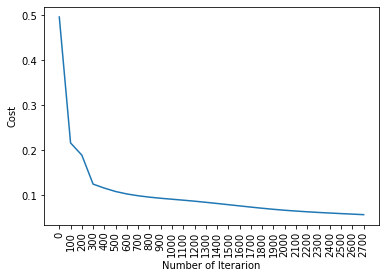

train accuracy: 92.10481099656357 %
test accuracy: 91.27147766323024 %


In [32]:
parameters, connection_amount=multi_layer_model([16,8],x_train,y_train,x_test,y_test,num_iter=2800,lr=0.3)

# the first array is where we desing our net for hidden layers with nodes.
